Hui (Henry) Chen<br>
New York Institute of Technology<br>
DTSC 710 - Machine Learning<br>
Project Assignment 1<br>
26/09/2021<br>
<br>
Professor: Dr. Kiran Balagani<br>
Dataset: https://archive.ics.uci.edu/ml/datasets/car+evaluation

# Preprocessing

In [155]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [23]:
header = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
dataset = pd.read_csv("./dataset/car.data", names=header, encoding="utf-8")

## Check data info

In [24]:
dataset.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [25]:
dataset.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,4,4,small,low,unacc
freq,432,432,432,576,576,576,1210


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## Check missing data

In [29]:
def check_missing_data(df):
    '''
    check missing data from the given dataset/
    
    INPUT:
        df: dataframe
    
    OUTPUT:
        return the result of missing data in percentage
    '''
    missing_values_count = df.isnull().sum()
    
    tot_cells = np.product(df.shape)
    
    tot_missing = missing_values_count.sum()

    # percent of data that is missing
    return ((tot_missing/tot_cells) * 100)

In [31]:
print("Missing data is: {} %".format(check_missing_data(dataset)))

Missing data is: 0.0 %


## Check all distinct value in each col

In [32]:
dataset.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

In [40]:
for item in dataset.columns:
    temp = dataset[item].value_counts()
    print(temp, end="\n\n")

low      432
vhigh    432
med      432
high     432
Name: buying, dtype: int64

low      432
vhigh    432
med      432
high     432
Name: maint, dtype: int64

4        432
2        432
3        432
5more    432
Name: doors, dtype: int64

4       576
more    576
2       576
Name: persons, dtype: int64

small    576
med      576
big      576
Name: lug_boot, dtype: int64

low     576
med     576
high    576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



## Spliting the dataset into input matrix features and class

In [120]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

## Encoding the categorical data

* Nominal data: "doors" and "persons"<br>
* Ordinal data: "buying", "maint", "lug_boot", "safety"
* Class label: "class"
<br><br>
- Ref: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

### Nominal (OneHot) and Ordinal Encoding

#### Training Set

In [121]:
#x[:, 3]

In [122]:
x

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [123]:
target_col_onehot = ["doors", "persons"]
target_col_ordinal = ["buying", "maint", "lug_boot", "safety"]

full_pipeline = ColumnTransformer(transformers=[
    ('encoder_onehote', OneHotEncoder(), target_col_onehot), 
    ('encoder_ordinal', OrdinalEncoder(), target_col_ordinal)
], remainder='passthrough')

In [124]:
x = np.array(full_pipeline.fit_transform(x))

In [125]:
x.shape

(1728, 11)

In [126]:
for item in x:
    print(item, end="\n")

[1. 0. 0. 0. 1. 0. 0. 3. 3. 2. 1.]
[1. 0. 0. 0. 1. 0. 0. 3. 3. 2. 2.]
[1. 0. 0. 0. 1. 0. 0. 3. 3. 2. 0.]
[1. 0. 0. 0. 1. 0. 0. 3. 3. 1. 1.]
[1. 0. 0. 0. 1. 0. 0. 3. 3. 1. 2.]
[1. 0. 0. 0. 1. 0. 0. 3. 3. 1. 0.]
[1. 0. 0. 0. 1. 0. 0. 3. 3. 0. 1.]
[1. 0. 0. 0. 1. 0. 0. 3. 3. 0. 2.]
[1. 0. 0. 0. 1. 0. 0. 3. 3. 0. 0.]
[1. 0. 0. 0. 0. 1. 0. 3. 3. 2. 1.]
[1. 0. 0. 0. 0. 1. 0. 3. 3. 2. 2.]
[1. 0. 0. 0. 0. 1. 0. 3. 3. 2. 0.]
[1. 0. 0. 0. 0. 1. 0. 3. 3. 1. 1.]
[1. 0. 0. 0. 0. 1. 0. 3. 3. 1. 2.]
[1. 0. 0. 0. 0. 1. 0. 3. 3. 1. 0.]
[1. 0. 0. 0. 0. 1. 0. 3. 3. 0. 1.]
[1. 0. 0. 0. 0. 1. 0. 3. 3. 0. 2.]
[1. 0. 0. 0. 0. 1. 0. 3. 3. 0. 0.]
[1. 0. 0. 0. 0. 0. 1. 3. 3. 2. 1.]
[1. 0. 0. 0. 0. 0. 1. 3. 3. 2. 2.]
[1. 0. 0. 0. 0. 0. 1. 3. 3. 2. 0.]
[1. 0. 0. 0. 0. 0. 1. 3. 3. 1. 1.]
[1. 0. 0. 0. 0. 0. 1. 3. 3. 1. 2.]
[1. 0. 0. 0. 0. 0. 1. 3. 3. 1. 0.]
[1. 0. 0. 0. 0. 0. 1. 3. 3. 0. 1.]
[1. 0. 0. 0. 0. 0. 1. 3. 3. 0. 2.]
[1. 0. 0. 0. 0. 0. 1. 3. 3. 0. 0.]
[0. 1. 0. 0. 1. 0. 0. 3. 3. 2. 1.]
[0. 1. 0. 0. 1. 0. 0

[1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1.]
[1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 2.]
[1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.]
[1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 2.]
[1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
[1. 0. 0. 0. 0. 0. 1. 1. 1. 2. 1.]
[1. 0. 0. 0. 0. 0. 1. 1. 1. 2. 2.]
[1. 0. 0. 0. 0. 0. 1. 1. 1. 2. 0.]
[1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
[1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 2.]
[1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
[1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 2.]
[1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
[0. 1. 0. 0. 1. 0. 0. 1. 1. 2. 1.]
[0. 1. 0. 0. 1. 0. 0. 1. 1. 2. 2.]
[0. 1. 0. 0. 1. 0. 0. 1. 1. 2. 0.]
[0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1.]
[0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 2.]
[0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.]
[0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.]
[0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 2.]
[0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.]
[0. 1. 0. 0. 0. 1. 0. 1. 1. 2. 1.]
[0. 1. 0. 0. 0. 1. 0. 1. 1. 2. 2.]
[0. 1. 0. 0. 0. 1. 0. 1. 1. 2. 0.]
[0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1.]
[0. 1. 0. 0. 0. 1. 0

In [127]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

In [128]:
for item in y:
    print(item, end="\n")

unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unacc
unac

#### Test set

In [129]:
le = LabelEncoder()
y = le.fit_transform(y)

In [130]:
y

array([2, 2, 2, ..., 2, 1, 3])

## Splitting data into test and training set

In [142]:
'''
It is good idea to encoding the categorical data before splitting the dataset into train and test set

As per requirement, the test_size should be 0.4, 0.5, 0.25, and 0.1;
therefore, make a big list that contains various test size ratio.
'''

train_test_set = list()
train_test_ratio = [0.2, 0.4, 0.5, 0.25, 0.1]

for ratio in train_test_ratio:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=0)
    train_test_set.append({
        "X_train": X_train, 
        "X_test": X_test, 
        "y_train": y_train, 
        "y_test": y_test
    })

In [143]:
X_train

array([[0., 0., 0., ..., 3., 0., 2.],
       [0., 0., 1., ..., 2., 1., 2.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 2., 2.],
       [0., 1., 0., ..., 2., 2., 1.]])

In [144]:
X_train.shape

(1555, 11)

In [145]:
y_test.shape

(173,)

In [146]:
for item in y_test:
    print(item, end="\n")

2
2
2
2
2
1
2
0
0
2
2
2
0
2
2
0
2
2
0
2
1
0
0
2
2
2
2
2
2
2
1
0
2
0
1
2
2
2
2
2
2
2
2
2
3
2
2
0
2
2
2
2
2
2
2
2
2
2
2
0
0
2
2
2
2
0
2
2
2
2
2
0
0
0
0
0
2
0
0
2
0
0
0
2
2
2
2
1
2
2
2
0
2
2
2
3
2
0
0
2
2
2
0
2
3
0
2
0
2
2
2
2
2
0
2
1
0
2
2
2
2
2
3
2
2
2
2
0
1
2
2
2
0
2
2
2
2
2
2
2
2
2
2
0
2
2
0
2
0
0
0
0
2
2
2
0
2
2
2
2
0
2
2
2
0
2
2
2
2
2
2
2
2


# Models

1. Naïve Bayes
2. Decision Trees
3. Random Forest

In this case, we want to have Naïve Bayes and Decision Trees together inside a loop to train the model in order to get classify boundary. For Random Forest, we need to deal separately as we need to find the optimal number of ntree for the model. 

In [153]:
# model outcome statistic
naiveBayes_model = list()
decisionTree_model = list()
randomForest_model = list()

In [161]:
# config the plot side by side
# ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# plt.subplot(2, 5, 1)

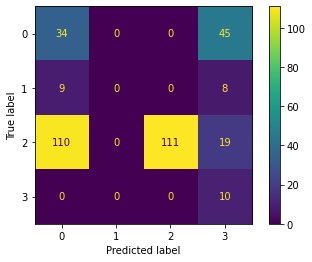

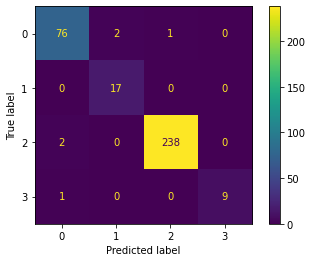

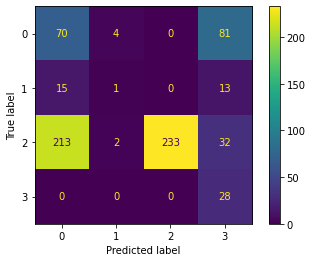

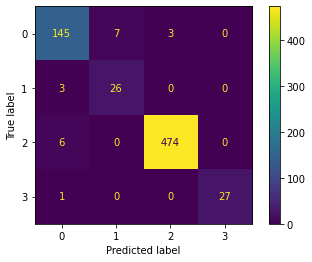

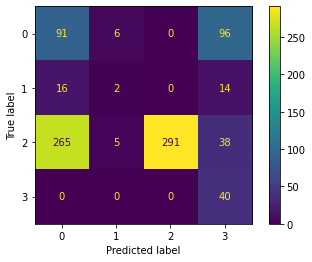

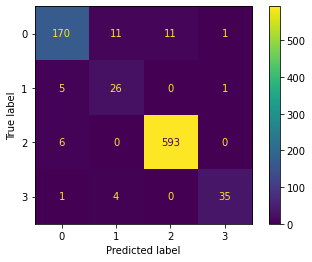

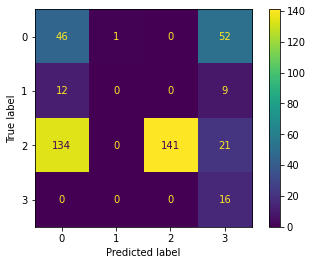

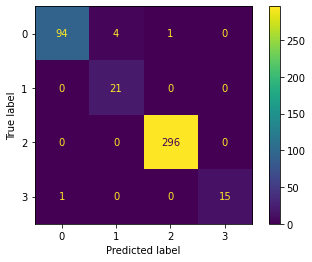

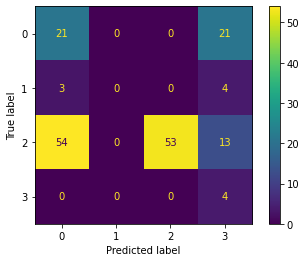

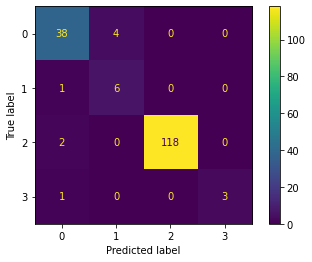

In [160]:
for ratio_item in train_test_set:
    
    
    ############ Naïve Bayes Model ############
    gnb = GaussianNB()
    gnb.fit(ratio_item['X_train'], ratio_item['y_train'])
    
    # get the y predict
    y_pred = gnb.predict(ratio_item['X_test'])
    
    # confusion matrix plotting data
    disp = plot_confusion_matrix(gnb, ratio_item['X_test'], ratio_item['y_test'])
    
    naiveBayes_model.append({
        "y_pred": y_pred,
        "y_pred_compare": np.concatenate((y_pred.reshape(len(y_pred), 1), ratio_item['y_test'].reshape(len(ratio_item['y_test']), 1)), axis=1),
        "accuracy_score": accuracy_score(ratio_item['y_test'], y_pred),
        "confusion_matrix": disp,
    })
    
    
    ############ Decision Trees Model ############
    tree_cl = DecisionTreeClassifier(criterion="entropy", random_state=0)
    tree_cl.fit(ratio_item['X_train'], ratio_item['y_train'])
    
    y_pred = tree_cl.predict(ratio_item['X_test'])
    
    disp = plot_confusion_matrix(tree_cl, ratio_item['X_test'], ratio_item['y_test'])
    
    decisionTree_model.append({
        "y_pred": y_pred,
        "y_pred_compare": np.concatenate((y_pred.reshape(len(y_pred), 1), ratio_item['y_test'].reshape(len(ratio_item['y_test']), 1)), axis=1),
        "accuracy_score": accuracy_score(ratio_item['y_test'], y_pred),
        "confusion_matrix": disp,
    })

In [172]:
r = 0
for ratio in train_test_set:
    for tree in range(1, 50):
        
        ############ Naïve Bayes Model ############
        forest_cl = RandomForestClassifier(n_estimators=tree, criterion="entropy", random_state=0)
        forest_cl.fit(ratio_item['X_train'], ratio_item['y_train'])
        
        y_pred = tree_cl.predict(ratio_item['X_test'])

        # disp = plot_confusion_matrix(tree_cl, ratio_item['X_test'], ratio_item['y_test'])
        y_test = ratio_item['y_test']
    
        accuracy = accuracy_score(ratio_item['y_test'], y_pred)
        print("At ratio of {} with {} tree is {} % accuracy".format(train_test_ratio[r], tree, accuracy))
    r+=1

At ratio of 0.2 with 1 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 2 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 3 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 4 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 5 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 6 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 7 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 8 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 9 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 10 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 11 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 12 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 13 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 14 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 15 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 16 tree is 0.953757225433526 % accuracy
At ratio of 0.2 with 17 tree is 0

At ratio of 0.5 with 41 tree is 0.953757225433526 % accuracy
At ratio of 0.5 with 42 tree is 0.953757225433526 % accuracy
At ratio of 0.5 with 43 tree is 0.953757225433526 % accuracy
At ratio of 0.5 with 44 tree is 0.953757225433526 % accuracy
At ratio of 0.5 with 45 tree is 0.953757225433526 % accuracy
At ratio of 0.5 with 46 tree is 0.953757225433526 % accuracy
At ratio of 0.5 with 47 tree is 0.953757225433526 % accuracy
At ratio of 0.5 with 48 tree is 0.953757225433526 % accuracy
At ratio of 0.5 with 49 tree is 0.953757225433526 % accuracy
At ratio of 0.25 with 1 tree is 0.953757225433526 % accuracy
At ratio of 0.25 with 2 tree is 0.953757225433526 % accuracy
At ratio of 0.25 with 3 tree is 0.953757225433526 % accuracy
At ratio of 0.25 with 4 tree is 0.953757225433526 % accuracy
At ratio of 0.25 with 5 tree is 0.953757225433526 % accuracy
At ratio of 0.25 with 6 tree is 0.953757225433526 % accuracy
At ratio of 0.25 with 7 tree is 0.953757225433526 % accuracy
At ratio of 0.25 with 8 